In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
from sklearn import manifold,datasets,decomposition,cluster
import matplotlib.pyplot as plt

In [2]:
adata = sc.read_h5ad('rc.integrated.data.h5ad')
adata

AnnData object with n_obs × n_vars = 110427 × 17513
    obs: 'cell_type', 'cell_type2'
    uns: 'consensus_time', 'iroot'
    obsm: 'X_pca', 'umap'

In [3]:
from dtne import *
import time

In [4]:
X_pca = adata.obsm["X_pca"] 

The code runs 274s.


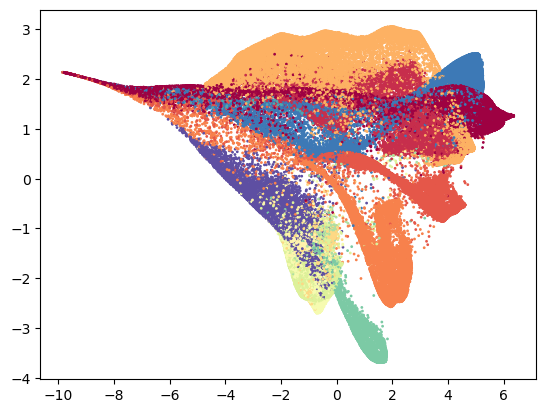

In [5]:
start_time = time.time()
embedding = DTNE(k_neighbors =300,l1 = 10) # 
Y = embedding.fit_transform(X_pca)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))
plt.scatter(Y[:,0], Y[:,1], c=adata.obs["cell_type2"],s=1,cmap='Spectral')

The code runs 267s.


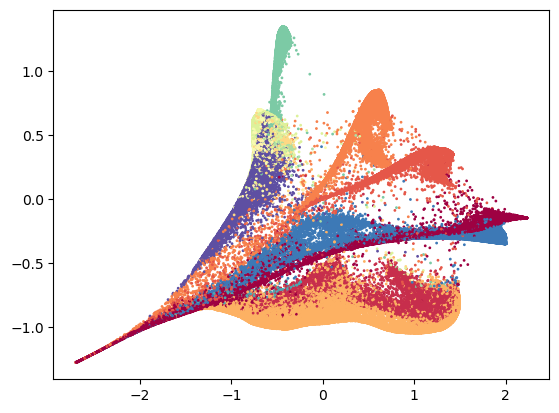

In [6]:
start_time = time.time()
embedding = DTNE(k_neighbors =300, l1 = 40) # l1 = 10,
Y = embedding.fit_transform(X_pca)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))
plt.scatter(Y[:,0], Y[:,1], c=adata.obs["cell_type2"],s=1,cmap='Spectral')

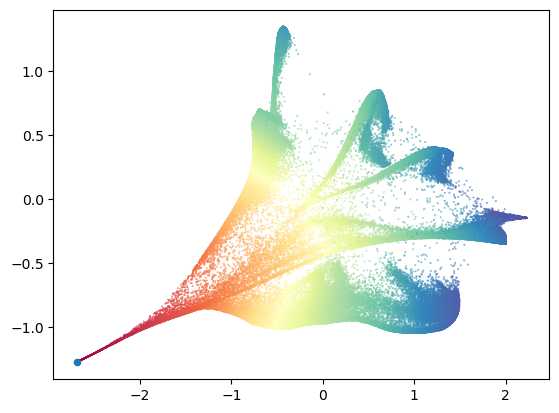

In [7]:
diff_time = embedding.order_cells(root_cells=[3631])
plt.scatter(Y[:,0], Y[:,1],c=diff_time,s=0.1,cmap='Spectral')
plt.scatter(Y[3631,0], Y[3631,1],s=20)

The code runs 716s.


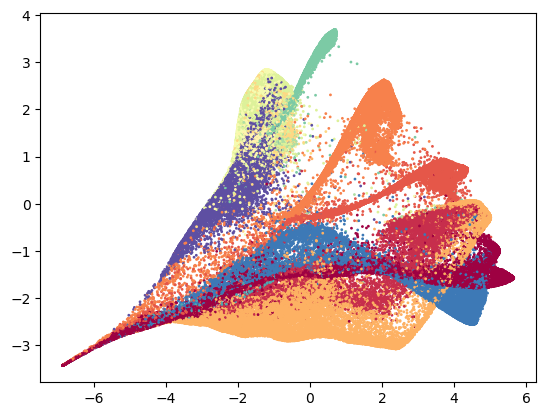

In [8]:
start_time = time.time()
embedding = DTNE(k_neighbors =800, l1 = 5) # l1 = 10,
Y = embedding.fit_transform(X_pca)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))
plt.scatter(Y[:,0], Y[:,1], c=adata.obs["cell_type2"],s=1,cmap='Spectral')

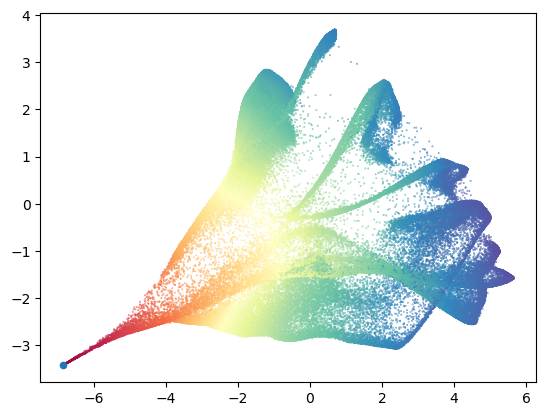

In [9]:
diff_time = embedding.order_cells(root_cells=[3631])
plt.scatter(Y[:,0], Y[:,1],c=diff_time,s=0.1,cmap='Spectral')
plt.scatter(Y[3631,0], Y[3631,1],s=20)

In [10]:
pd.DataFrame(Y).to_csv('rc.integrated.dtne_y.csv')
pd.DataFrame(diff_time).to_csv('rc.integrated.dtne_pseudotime.csv')

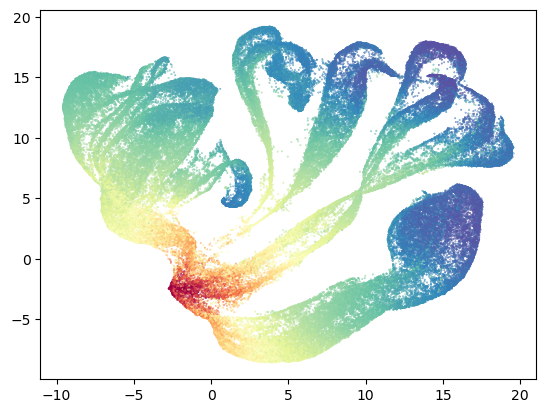

In [19]:
umap = adata.obsm['umap']
plt.scatter(umap[:,0],umap[:,1], c=diff_time,s =0.1,cmap="Spectral")

Calculating PHATE...
  Running PHATE on 110427 observations and 50 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 121.96 seconds.
    Calculating affinities...
    Calculated affinities in 3.39 seconds.
  Calculated graph and diffusion operator in 126.03 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 29.79 seconds.
    Calculating KMeans...
    Calculated KMeans in 4.92 seconds.
  Calculated landmark operator in 36.73 seconds.
  Calculating optimal t...
    Automatically selected t = 24
  Calculated optimal t in 2.14 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.35 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.85 seconds.
Calculated PHATE in 167.13 seconds.


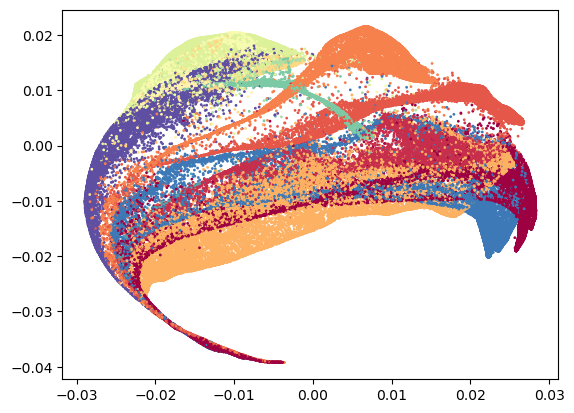

In [21]:
import phate
phate_operator = phate.PHATE(knn=100)
Y_phate = phate_operator.fit_transform(X_pca)
plt.scatter(Y_phate[:,0], Y_phate[:,1], c=adata.obs["cell_type2"],s=1,cmap='Spectral')

The code runs 691s.


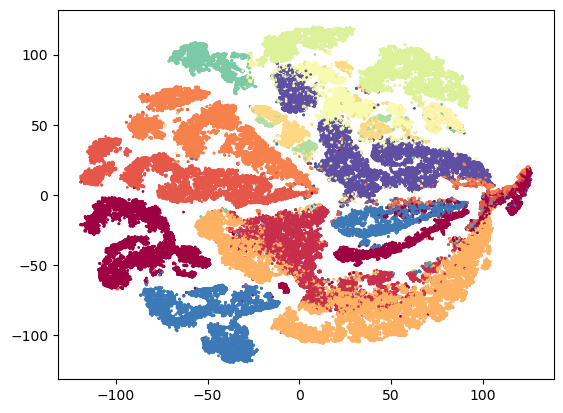

In [22]:
from sklearn import neighbors, decomposition, manifold
start_time = time.time()
tsne_operator = manifold.TSNE(perplexity=50)
Y_tsne = tsne_operator.fit_transform(X_pca)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))
plt.scatter(Y_tsne[:,0],Y_tsne[:,1], c=adata.obs["cell_type2"],s =1,cmap="Spectral")

The code runs 47s.


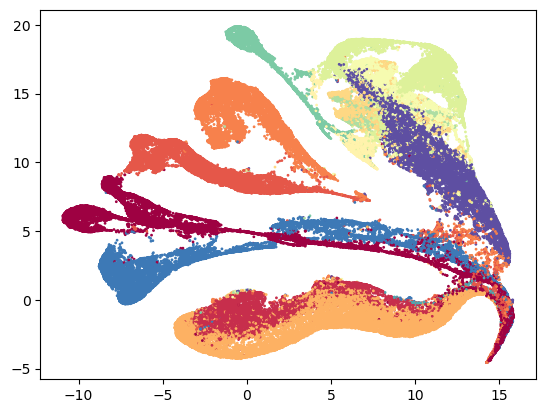

In [23]:
from umap import UMAP
start_time = time.time()
reducer = UMAP() #   n_neighbors=15,min_dist=0.6,
Y_umap = reducer.fit_transform(X_pca)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))
plt.scatter(Y_umap[:,0],Y_umap[:,1], c=adata.obs["cell_type2"],s =1,cmap="Spectral")

In [24]:
pd.DataFrame(Y_tsne).to_csv('rc.integrated.tsne_y.csv')
pd.DataFrame(Y_umap).to_csv('rc.integrated.umap_y.csv')

In [25]:
pd.DataFrame(Y_phate).to_csv('rc.integrated.phate_y.csv')